## Erdos-Renyi (ER)

The simplest random graph model is the Erd&ouml;s R&eacute;nyi (ER) model<sup>1</sup>. The ER model is simple in that it requires the minimum number of parameters for a random graph model:

1. $n$: the number of vertices in the graph, and
2. $p$: an edge existence probability parameter governing how edges are connected.  

If the graph $G = (\mathcal V, \mathcal E)$ is an Erd&ouml;s R&eacute;nyi with $n$ vertices and probability $p$, we say that the adjacency matrix $\pmb A$ associated with $G$ is distributed as $ER_n(p)$, which we denote by $\pmb A \sim ER_n(p)$. To describe the vertices and edges of $G$ in more detail, note that a graph with $n$ vertices has the vertex set $\mathcal V = \{v_i\}_{i = 1}^n$. Next, we consider the stochastic element of $G$: the adjacencies. Recall that in a binary graph, that the following relationships hold:
\begin{align*}
    A_{ij} = 1\iff e_{ij} \in \mathcal E \\
    A_{ij} = 0 \iff e_{ij} \not\in \mathcal E
\end{align*}
That is, an adjacency $A_{ij}$ is $1$ precisely when an edge adjoins $v_i$ and $v_j$, and is $0$ when an edge does not adjoin $v_i$ and $v_j$. In an $ER_n(p)$ graph, the adjacencies $A_{ij}$ take the value $1$ with probability $p$ (that is, an edge exists between $v_i$ and $v_j$ with probability $p$) and takes the value $0$ with probability $1-p$ (that is, an edge does not exist between $v_i$ and $v_j$ with probability $1-p$). The probability of an edge existing which is incident a given pair of vertices cannot be stochastically described in more detail than that an incidence exists with probability $p$. In this sense, we write that $A_{ij} \sim Bernoulli(p)$, for all adjacencies $i, j = 1, ..., n$. While the $ER_n(p)$ random graph model tends to be rather overly simplistic in that it is unable to describe relationships more complex than the probability of existence or not existence of an edge, it tends to be useful in that more complex properties of the $ER_n(p)$ graph tend to be solveable explicitly. 

The following python code can be used to generate and visualize the adjacency matrices describing a graph which has the $ER_n(p)$ distribution.

<AxesSubplot:title={'center':'ER(50, .3) Simulation'}>

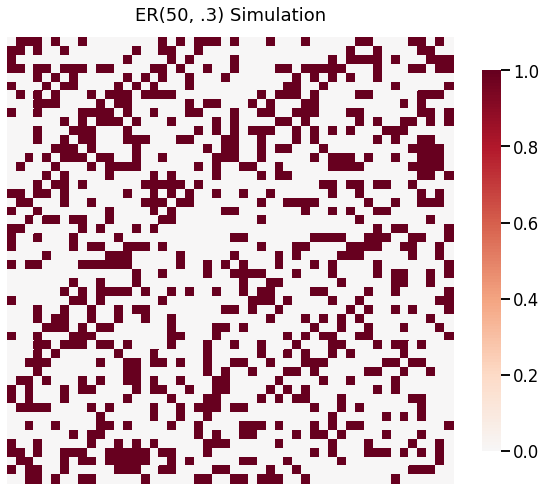

In [2]:
from graspologic.plot import heatmap
from graspologic.simulations import er_np

n = 50  # graph with 50 vertices
ps = .3  # probability of an edge existing is .3

# sample a single adj. mtx from ER(50, .3)
As = er_np(n=n, p=ps, directed=False, loops=True)

# and plot it
heatmap(As, title="ER(50, .3) Simulation")

In the simple simulation above, we sample a single graph, $G_{s}$, with the adjacency matrix $\pmb A_{s}$ taking the distribution $ER_{50}(.3)$. Visually, the $ER_n(p)$ model tends to be characterized by a lack of "structure" to the edges, wherein the edges do not appear to be more tightly or loosely packed around particular vertices, sets of vertices, sets of edges, or otherwise. This is a consequence of the fact that the $ER_n(p)$ model is a very simple description of a random graph.

Note that the estimated probability $\hat p_{s}$ of an adjacency in $A_{s}$ (and correspondingly, the probability of an edge existing in $G_{s}$) is:

In [4]:
print("phat_small = {}".format(As.mean()))

phat_small = 0.3144


Which is in close agreement to the true probability, $p_s = .3$. When $p$ is larger, we might see something like the following:

<AxesSubplot:title={'center':'ER(50, .7) Simulation'}>

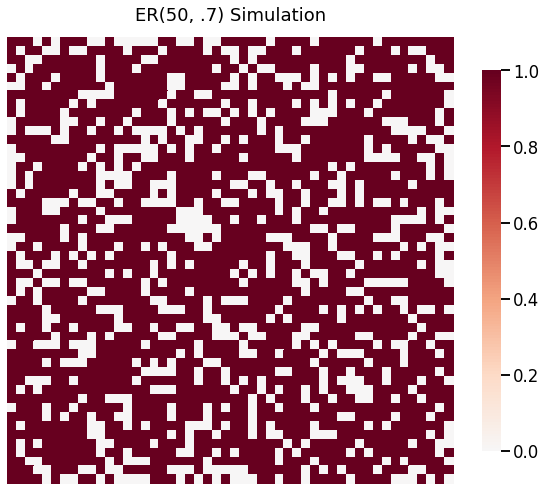

In [5]:
pl = .7  # graph has an edge probability of .7

# sample a single adj. mtx from ER(50, .7)
Al = er_np(n=n, p=pl, directed=False, loops=True)

# and plot it
heatmap(Al, title="ER(50, .7) Simulation")

As the edge existence probability increases, the sampled adjacency matrix tends to have more adjacencies with values of $1$. This is because there is a higher chance of an edge existing when $p$ is larger.

## Stochastic Block Model (SBM)

The Stochastic Block Model, or SBM, is a random graph model which produces graphs in which edge existence probabilities depend upon which vertices a given edge is adjacent to. If the graph $G = (\mathcal V, \mathcal E)$ is an SBM with $n$ vertices, each vertex $v_i$ can take be a member of one (and only one) of $K$ possible communities. In this case, rather than having a single edge existence probability, each pair of communities has its own unique edge existence probability. Formally, $G$ has the parameters:
1. $n$: the number of vertices,
2. $\vec \tau \in \{1, ..., K\}^n$: the vertex assignment vector for each of the $n$ vertices to one of $K$ communities, and
3. $\pmb B \in [0, 1]^{K \times K}$: the symmetric edge existence probability for each of the $K \times K$ possible communities.

The vertex assignment vector has entries $\vec \tau_i$, where $i = 1, ..., n$, for each of the vertices in the graph. For a given vertex $v_i \in \mathcal V$, the corresponding vertex assignment $\vec \tau_i$ defines which of the $K$ communities in which $v_i$ is a member. For instance, in a social network in which the vertices are students and the edges define whether two students are friends, a vertex assignment vector might denote the school in which each student learns. The matrix $\pmb B$ with entries $b_{kl}$ for $k, l = 1,..., K$ defines the probability of an edge existing between vertices which are in community $k$ with vertices which are in community $l$. For instance, in the social network example, one might select $\pmb B$ such that the diagonal entries $b_{kk}$ for $k = 1,..., K$ tend to exceed off-diagonal entries $b_{kl}$ where $k \neq l$ and $k,l = 1,...,K$. Further, the matrix $\pmb B$ is supposed to be symmetric; that is, for any $b_{kl}$, it is always the case that $b_{k,l} = b_{lk}$ for all $k = 1,..., K$. Intuitionally, this would correspond to the graph in which each of the  The matrix $\pmb B$ defines that if vertex $v_i$ is in community $k$ and vetex $v_j$ is in community $l$, then an edge $e_{ij}$ or $e_{ji}$ exists between $v_i$ and $v_j$ with probability $b_{kl}=b_{lk}$. Fomally, we wite that $\pmb A \sim SBM_n(\vec \tau, \pmb B)$ if $A_{ij} | v_i = k, v_j = l \sim Bernoulli(b_{kl})$, or equivalently due to the symmetry of $\pmb B$, $A_{ji} | v_i = k, v_j = l \sim Bernoulli(b_{kl})$, for all $i,j \in 1,...,n$.

The following python code can be used to generate and visualize the adjacency matrices describing a graph which has the $SBM_n(\vec \tau, \pmb B)$ distribution.

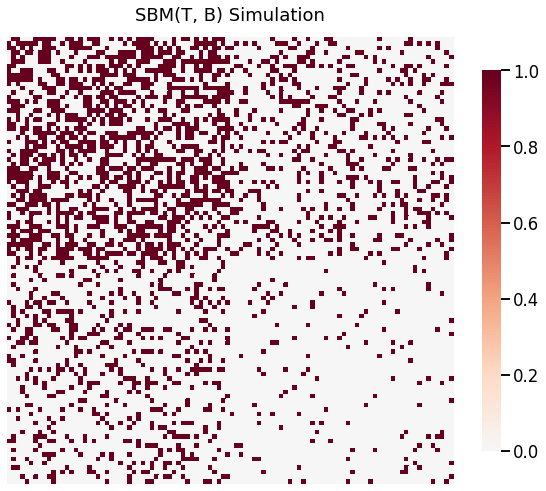

In [7]:
from graspologic.simulations import sbm

# for simplicity, the simulation code generates samples wherein
# vertices from the same community are ordered in the vertex set by
# their community order. Note that it would be theoretically equivalent to
# denote the total number of vertices in each community, or provide
# a vector tau with the first 50 entries taking the value 1, and the
# second 50 enties taking the value 0, given this fact.
ns = [50, 50]
n = sum(ns)

n = sum(ns)  # total number of vertices is the sum of the 
B = [[.5, .2],
    [.2, .05]]

A = sbm(n=ns, p=B)
_=heatmap(A, title="SBM(T, B) Simulation")

In the above simulation, we can clearly see an apparent $4$-"block structure", which describes the fact that the probability of an edge existing depends upon which of the $4$ "blocks" the edge falls into. These blocks are the apparent "subgraphs", or square patterns, observed in the above graph. The block structure is clearly delineated by the first $50$ vertices being from a single community, and the second $50$ vertices being from a different community.

It is important to note that a graph may be $SBM_n(\vec \tau, \pmb B)$ regardless of whether a block structure is visually discernable. Indeed, the block structure may only be apparent given a particular ordering of the vertices, an otherwise, may not even be discernable at all. Consider, for instance, a similar adjacency matrix to the graph plotted above, with the exact same realization, up to a permutation (reordering) of the vertices. The below graph shows the exact same set of adjacencies as-above, but wherein $\pmb A$ has had its vertices resorted randomly. The graph has an identical block structuure (up to the reordering of the vertices) as the preceding graph illustrated.

<ipython-input-11-8581568507e8>:8: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  heatmap(A[[vtx_perm]] [:,vtx_perm])


<AxesSubplot:>

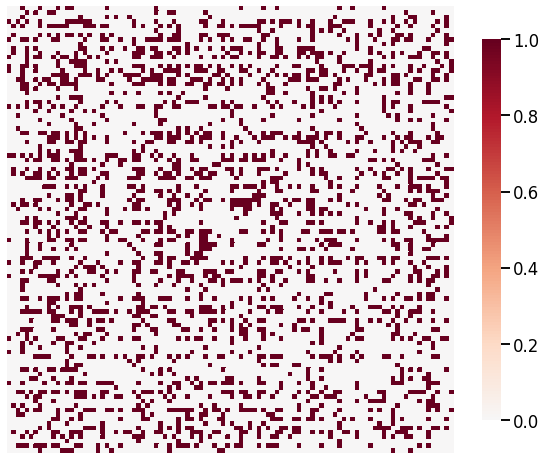

In [11]:
import numpy as np

# generate a permutation of the n vertices
vtx_perm = np.random.choice(n, size=n, replace=False)

# same adjacency matrix (up to reorder of the vertices)

heatmap(A[[vtx_perm]] [:,vtx_perm])

In this sense, it becomes quite difficult in practice to determine whether community structure exists simply by looking at a graph, unless you are looking at a graph in which the vertices are already arranged in an order which respects the community struucture. 

## Structured Independent Edge Model (SIEM)

## Random Dot Product Graph (RDPG)

## Generalized Random Dot Product Graph (GRDPG)

## Degree-Corrected Models

## Inhomogeneous Erdos-Renyi (IER)

# References

[1] Erd&ouml;s P, R&eacute;nyi A. 1959. "On random graphs, I." Publ. Math. Debrecen 6:290–297.
